In [20]:
import skimage.io as io

import glob
from skimage.filters import threshold_otsu, threshold_local, rank
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.feature import peak_local_max
from scipy import ndimage
from skimage import util
from skimage.morphology import disk, watershed
import pandas as pd
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import distance as dist
import scipy.cluster.hierarchy as hier
import numpy as np
import cv2

img = cv2.imread('C:/Users/juanr/Documents/mediciones_ZEISS/bandas/Banda2scenes/Banda2scenes_m007.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [22]:
pixels_to_microns = 0.586
cv2.imshow('thresh',thresh)
cv2.waitKey(0)

48

In [14]:

proplist = ['label','area','centroid','equivalent_diameter','extent']
path = "C:/Users/juanr/Documents/mediciones_ZEISS/bandas/Banda2scenes/*.png"

In [15]:
img = io.imread('C:/Users/juanr/Documents/mediciones_ZEISS/bandas/Banda2scenes/Banda2scenes_m007.png')
img = rgb2gray(img)
img = util.invert(img)

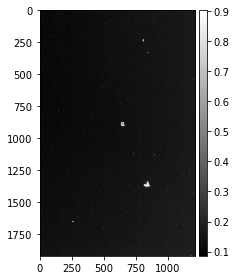

In [16]:
io.imshow(img,cmap='gray')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


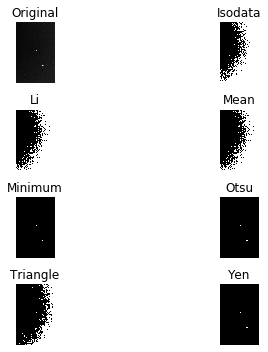

In [17]:
from skimage import filters
filters.try_all_threshold(img);

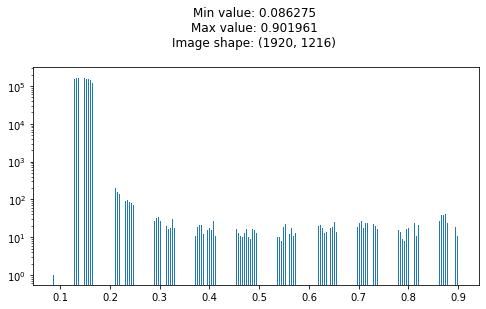

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.hist(img.flatten(), log=True,
        bins=1000)

_ = ax.set_title('Min value: %f \n'
                 'Max value: %f \n'
                 'Image shape: %s \n'
                 % (img.min(),
                    img.max(),
                    img.shape))

In [19]:
max_int_proj = img.max()
thresh_global = threshold_otsu(max_int_proj)

smoothed_stack = np.zeros_like(img)
labeled_stack = smoothed_stack.copy()

for file in glob.glob(path):
    smoothed = rank.median(file, disk(smooth_size))
    smoothed = rank.enhance_contrast(smoothed, disk(smooth_size))
    smoothed_stack[z] = smoothed
    im_max = smoothed.max()
    thresh = thresh_global
    # thresh = threshold_otsu(smoothed)
    if im_max < thresh_global:
        labeled_stack[z] = np.zeros(smoothed.shape, dtype=np.int32)
    else:
        binary = smoothed > thresh
        #binary = threshold_adaptive(smoothed, block_size=smooth_size)
        
        distance = ndimage.distance_transform_edt(binary)
        local_maxi = peak_local_max(distance, min_distance=2*min_radius,
                                    indices=False, labels=smoothed)
        markers = ndimage.label(local_maxi)[0]
        labeled_stack[z] = watershed(-distance, markers, mask=binary)

ValueError: threshold_otsu is expected to work with images having more than one color. The input image seems to have just one color 0.9019607843137255.